# Import packages

In [1]:
from model import *
from torchsummary import summary
from torchvision.models import efficientnet_b0
from torch.utils.data import DataLoader
from datasets import *
from torch.optim import lr_scheduler
from torchvision import transforms, datasets
import time
from torchvision.transforms import InterpolationMode

c:\Users\hoang\AppData\Local\Programs\Python\Python39\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\hoang\AppData\Local\Programs\Python\Python39\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B0_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B0_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Sequential(
  (0): Dropout(p=0.2, inplace=True)
  (1): Linear(in_features=1280, out_features=1000, bias=True)
)


# Import model

In [2]:
model = efficientnet_b0(pretrained=True)

summary(model, (3, 224, 224))

c:\Users\hoang\AppData\Local\Programs\Python\Python39\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\hoang\AppData\Local\Programs\Python\Python39\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B0_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B0_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 32, 112, 112]             864
       BatchNorm2d-2         [-1, 32, 112, 112]              64
              SiLU-3         [-1, 32, 112, 112]               0
            Conv2d-4         [-1, 32, 112, 112]             288
       BatchNorm2d-5         [-1, 32, 112, 112]              64
              SiLU-6         [-1, 32, 112, 112]               0
 AdaptiveAvgPool2d-7             [-1, 32, 1, 1]               0
            Conv2d-8              [-1, 8, 1, 1]             264
              SiLU-9              [-1, 8, 1, 1]               0
           Conv2d-10             [-1, 32, 1, 1]             288
          Sigmoid-11             [-1, 32, 1, 1]               0
SqueezeExcitation-12         [-1, 32, 112, 112]               0
           Conv2d-13         [-1, 16, 112, 112]             512
      BatchNorm2d-14         [-1, 16, 1

# Constants

In [3]:
ROOT_DIR = "../../data"

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

IMG_SIZE = (224, 224)

# Hyperparameters

In [4]:
epochs = 10
batch_size = 4

learning_rate = 1e-3


# Preparing dataset

In [5]:
splitDataset(train_ratio=0.8, dataset_root=ROOT_DIR)

### Standardlize process

In [6]:
def CalcStdVsMean():
    listImgs = []
    print("Calculating ...")
    for folder in os.listdir(ROOT_DIR):
        if folder != "dataset_info.csv":
            for fileName in os.listdir(f"{ROOT_DIR}/{folder}"):
                img = cv2.imread(f"{ROOT_DIR}/{folder}/{fileName}")
                listImgs.append(cv2.resize(img, IMG_SIZE, interpolation = cv2.INTER_AREA))
    listImgs = np.array(listImgs)
    return (listImgs/255.0).mean((0, 1, 2)), (listImgs /255.0).std((0,1,2))

MEAN, STD = CalcStdVsMean()

MEAN, STD

Calculating ...


(array([0.51551778, 0.43288471, 0.44265668]),
 array([0.19281362, 0.1960019 , 0.20439348]))

In [7]:

data_transforms = transforms.Compose([
    MixupTransform(),
    transforms.ToTensor(),
    transforms.Resize(IMG_SIZE,interpolation=InterpolationMode.BICUBIC),
    transforms.Normalize(MEAN, STD)
])


train_dataset = Violence_Drone_Dataset(root_dir=ROOT_DIR,train=True, transform=data_transforms)
test_dataset = Violence_Drone_Dataset(root_dir=ROOT_DIR,train=False, transform=data_transforms)

train_loader = DataLoader(dataset=train_dataset, shuffle=True, batch_size=batch_size, drop_last=True)
test_loader = DataLoader(dataset= test_dataset, shuffle=False, batch_size=batch_size, drop_last=False)




Folder [100/100]: 100%|██████████| 100/100 [00:12<00:00,  7.89folder/s]


Found 100 data of type Train


Folder [26/26]: 100%|██████████| 26/26 [00:03<00:00,  7.72folder/s]

Found 26 data of type Test


In [8]:
for epoch in range(epochs):
    print("EPOCH",epoch)
    for img, label in train_loader:
        print(label)

EPOCH 0
tensor([0, 0, 0, 0])
tensor([0, 0, 0, 0])
tensor([0, 0, 0, 0])
tensor([0, 0, 0, 0])
tensor([0, 0, 0, 0])
tensor([0, 0, 0, 0])
tensor([0, 0, 0, 0])
tensor([0, 0, 0, 0])
tensor([0, 0, 0, 0])
tensor([0, 0, 0, 0])
tensor([0, 0, 0, 0])
tensor([0, 0, 0, 0])
tensor([0, 0, 0, 0])
tensor([0, 0, 0, 0])
tensor([0, 0, 0, 0])
tensor([0, 0, 0, 0])
tensor([0, 0, 0, 0])
tensor([0, 0, 0, 0])
tensor([0, 0, 0, 0])
tensor([0, 0, 0, 0])
tensor([0, 0, 0, 0])
tensor([0, 0, 0, 0])
tensor([0, 0, 0, 0])
tensor([0, 0, 0, 0])
tensor([0, 0, 0, 0])
EPOCH 1
tensor([0, 0, 0, 0])
tensor([0, 0, 0, 0])
tensor([0, 0, 0, 0])
tensor([0, 0, 0, 0])
tensor([0, 0, 0, 0])
tensor([0, 0, 0, 0])
tensor([0, 0, 0, 0])
tensor([0, 0, 0, 0])
tensor([0, 0, 0, 0])
tensor([0, 0, 0, 0])
tensor([0, 0, 0, 0])
tensor([0, 0, 0, 0])
tensor([0, 0, 0, 0])
tensor([0, 0, 0, 0])
tensor([0, 0, 0, 0])
tensor([0, 0, 0, 0])
tensor([0, 0, 0, 0])
tensor([0, 0, 0, 0])
tensor([0, 0, 0, 0])
tensor([0, 0, 0, 0])
tensor([0, 0, 0, 0])
tensor([0, 0, 0, 0

In [9]:
samples = iter(train_loader)

imgs, labels = samples.__next__()

print(imgs.shape)

torch.Size([4, 3, 224, 224])


# Preparing for training

In [10]:
optimizer = torch.optim.AdamW(model.parameters(),
                              lr=learning_rate,
                              weight_decay=0.0005)

exp_lr_scheduler = lr_scheduler.MultiStepLR(
    optimizer,
    milestones=[20, 40, 60, 80, 100],
    gamma=0.2
)

criterion = nn.CrossEntropyLoss()

train_loss, train_accuracy = [], []
val_loss, val_accuracy = [], []


In [11]:
def fit(model, dataloader,epoch, epochs, train=True):
    if train:
        model.train()
    else:
        model.eval() 
    
    
    running_loss = 0.0
    running_correct = 0
    n_samples = 0
    
    print("Train" if train else "Val")
    
    with tqdm(dataloader, unit='batch') as tepoch:
        for images, labels in tepoch:    
            
            tepoch.set_description(f"Epoch [{epoch}/{epochs}]")
                
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)

            running_loss += loss.item()
            _, preds = torch.max(outputs, 1)
            correct = (preds == labels).sum().item()

            running_correct += (preds == labels).sum().item()

            n_samples += labels.size(0)

            if train:
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()
            
            tepoch.set_postfix(loss=loss.item()/labels.size(0), accuracy=100.*correct/labels.size(0))
            
        process_loss = running_loss / n_samples
        process_acc = 100. * running_correct / n_samples
    
    return process_loss, process_acc
                

# Training and evaluating

In [12]:
model = model.to(device)

start = time.time()

for epoch in range(epochs):
    
    train_epoch_loss, train_epoch_acc = fit(model, train_loader, epoch, epochs)
    exp_lr_scheduler.step()
    
    val_epoch_loss, val_epoch_acc = fit(model, test_loader, epoch, epochs, train=False)
    
    train_loss.append(train_epoch_loss)
    train_accuracy.append(train_epoch_acc)
    
    val_loss.append(val_epoch_loss)
    val_accuracy.append(val_epoch_acc)

end = time.time()

print((end-start)/60, 'minutes')

torch.save(model.state_dict(), "last_weights_v2.pth")
print("Model saved!")

Train


Epoch [0/10]: 100%|██████████| 25/25 [01:38<00:00,  3.92s/batch, accuracy=100, loss=0.00119] 


Val


Epoch [0/10]: 100%|██████████| 7/7 [00:08<00:00,  1.18s/batch, accuracy=100, loss=0.000756]


Train


Epoch [1/10]: 100%|██████████| 25/25 [01:31<00:00,  3.67s/batch, accuracy=100, loss=2.15e-6] 


Val


Epoch [1/10]: 100%|██████████| 7/7 [00:08<00:00,  1.28s/batch, accuracy=100, loss=0.384]   


Train


Epoch [2/10]: 100%|██████████| 25/25 [01:09<00:00,  2.78s/batch, accuracy=100, loss=8.87e-7]


Val


Epoch [2/10]: 100%|██████████| 7/7 [00:04<00:00,  1.48batch/s, accuracy=100, loss=0.17]    


Train


Epoch [3/10]: 100%|██████████| 25/25 [00:54<00:00,  2.19s/batch, accuracy=100, loss=2.41e-6]


Val


Epoch [3/10]: 100%|██████████| 7/7 [00:04<00:00,  1.51batch/s, accuracy=100, loss=0.381]   


Train


Epoch [4/10]: 100%|██████████| 25/25 [00:55<00:00,  2.21s/batch, accuracy=100, loss=1.87e-6]


Val


Epoch [4/10]: 100%|██████████| 7/7 [00:05<00:00,  1.39batch/s, accuracy=100, loss=0.369]   


Train


Epoch [5/10]: 100%|██████████| 25/25 [00:53<00:00,  2.13s/batch, accuracy=100, loss=0.000271]


Val


Epoch [5/10]: 100%|██████████| 7/7 [00:04<00:00,  1.53batch/s, accuracy=100, loss=1.36]  


Train


Epoch [6/10]: 100%|██████████| 25/25 [00:54<00:00,  2.18s/batch, accuracy=100, loss=5.27e-6] 


Val


Epoch [6/10]: 100%|██████████| 7/7 [00:04<00:00,  1.50batch/s, accuracy=100, loss=0.000174]


Train


Epoch [7/10]: 100%|██████████| 25/25 [01:49<00:00,  4.40s/batch, accuracy=100, loss=1.3e-6] 


Val


Epoch [7/10]: 100%|██████████| 7/7 [00:18<00:00,  2.64s/batch, accuracy=100, loss=0.000175]


Train


Epoch [8/10]: 100%|██████████| 25/25 [03:04<00:00,  7.39s/batch, accuracy=100, loss=3.01e-6] 


Val


Epoch [8/10]: 100%|██████████| 7/7 [00:26<00:00,  3.85s/batch, accuracy=100, loss=0.000131]


Train


Epoch [9/10]: 100%|██████████| 25/25 [02:02<00:00,  4.92s/batch, accuracy=100, loss=3.06e-6]


Val


Epoch [9/10]: 100%|██████████| 7/7 [00:10<00:00,  1.52s/batch, accuracy=100, loss=0.00034]

16.540188614527384 minutes
Model saved!


## Evaluation

In [13]:
def plotting(colors: tuple, labels : tuple, savefigName: str, data: tuple, figsize=(10, 7)):
    train, val = data
    color_train, color_val = colors
    label_train, label_val = labels
    
    plt.figure(figsize=figsize)
    plt.plot(train, color='green', label=label_train)
    plt.plot(val, color='blue', label=label_val)
    plt.legend()
    plt.savefig(savefigName)
    plt.show()

### Loss

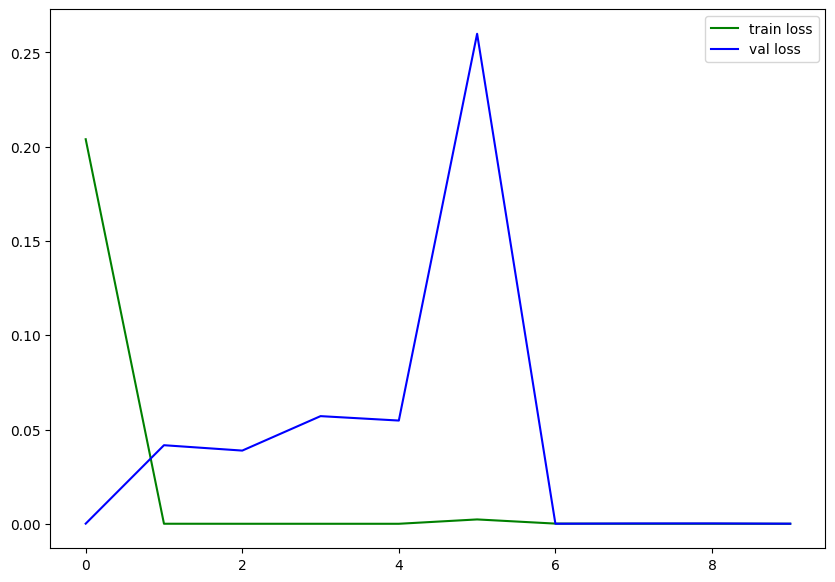

In [14]:
plotting(colors=('orange', 'red'),
         labels=("train loss", "val loss"),
         savefigName="loss.png",
         data=(train_loss, val_loss))


### Accuracy

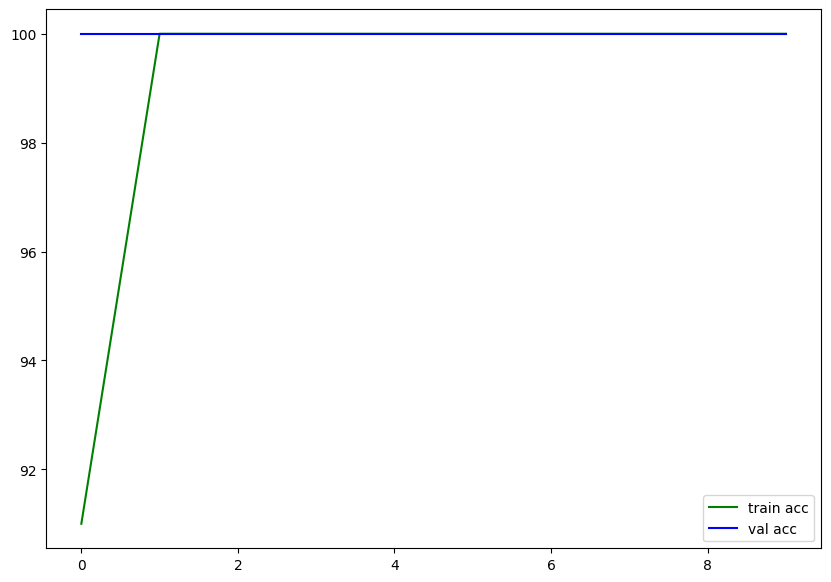

In [16]:
plotting(colors=('green', 'blue'),
         labels=("train acc", "val acc"),
         savefigName="acc.png",
         data=(train_accuracy, val_accuracy))